# Lab 5: Titanic

## Descripción

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Data

Overview

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.
### Data Dictionary
| Variable |	Definition |	Key   |
| -------- | ----------- | -------- |
| survival |	Survival   | 0 = No, 1 = Yes
| pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd
| sex |	Sex |	
| Age |	Age in years |	
| sibsp |	# of siblings / spouses aboard the Titanic 	|
| parch |	# of parents / children aboard the Titanic 	|
| ticket |	Ticket number 	|
| fare |	Passenger fare 	|
| cabin |	Cabin number 	|
| embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [287]:
import pandas as pd

train_data = pd.read_csv('./data/train.csv')
train_data = train_data[train_data['Age'].notna()]
train_data['Sex'] = train_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


# Logistic Regression

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'PassengerId'),
  Text(1.5, 0, 'Survived'),
  Text(2.5, 0, 'Pclass'),
  Text(3.5, 0, 'Sex'),
  Text(4.5, 0, 'Age'),
  Text(5.5, 0, 'SibSp'),
  Text(6.5, 0, 'Parch'),
  Text(7.5, 0, 'Fare')])

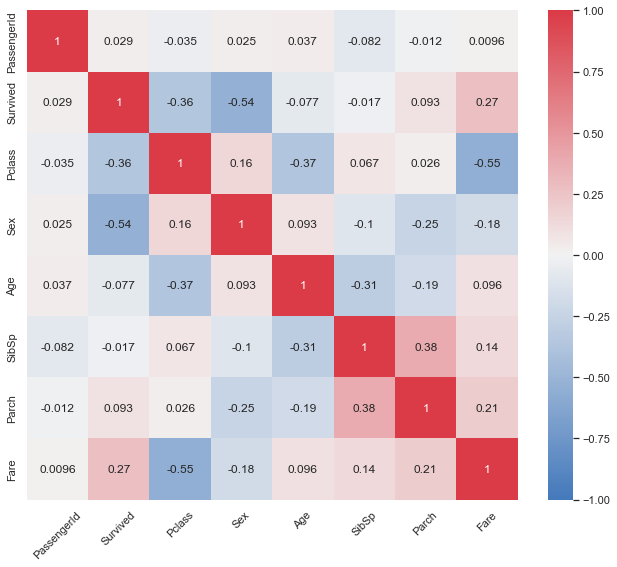

In [288]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style="white")
corr = train_data.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.xticks(rotation=45)

From the correlation matrix, we can see that the **Survived** variable has its strongest correlation with **Sex** (inverse) followed by the **Pclass** variable (inverse) and by the **Fare** variable (direct). **Pclass** also has a strong inverse correlation with **Age** and **Fare**. 

In [289]:
train_labels = train_data.Survived
train_features = train_data.drop('Survived', axis=1)
print(train_features.head())
print(train_labels.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    1  22.0      1      0         A/5 21171   7.2500   NaN        S  
1    0  38.0      1      0          PC 17599  71.2833   C85        C  
2    0  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3    0  35.0      1      0            113803  53.1000  C123        S  
4    1  35.0      0      0            373450   8.0500   NaN        S  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [290]:
train_features = train_features[['Pclass', 'Age', 'Fare', 'Sex']]
train_features

,Pclass,Age,Fare,Sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
885,3,39.0,29.1250,0
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
889,1,26.0,30.0000,1


## Basic model with Cross Validation

In [291]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(max_iter=15000, cv=10)
model.fit(train_features, train_labels)
score = model.score(train_features, train_labels)
print(f"Score on train dataset = {score}")


Score on train dataset = 0.7955182072829131


## Custom Cross Validation

In [292]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(n_splits=nfold, shuffle=False).split(y): # split data into train/test groups, 5 times
        clf.fit(x, y) # fit
        result += score_func(clf.predict(x), y) # evaluate score function on held-out data
    return result / nfold # average

In [293]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, train_features, train_labels)

        if score > max_score:
            max_score = score
            best_C =C
print (max_score, best_C)

0.7983193277310925 0.1


Slightly better model with Custom CV

## Predictions with Test Data

In [294]:
real_test_data = pd.read_csv('./data/test.csv')
real_test_data = real_test_data[real_test_data['Age'].notna()][['PassengerId','Pclass', 'Age', 'Fare', 'Sex']].dropna()
real_test_data['Sex'] = real_test_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
real_test_data

,PassengerId,Pclass,Age,Fare,Sex
0,892,3,34.5,7.8292,1
1,893,3,47.0,7.0000,0
2,894,2,62.0,9.6875,1
3,895,3,27.0,8.6625,1
4,896,3,22.0,12.2875,0
...,...,...,...,...,...
409,1301,3,3.0,13.7750,0
411,1303,1,37.0,90.0000,0
412,1304,3,28.0,7.7750,0
414,1306,1,39.0,108.9000,0


In [295]:
real_test_features = real_test_data[['Pclass', 'Age', 'Fare', 'Sex']]
real_test_features = real_test_features
real_test_features

,Pclass,Age,Fare,Sex
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0
...,...,...,...,...
409,3,3.0,13.7750,0
411,1,37.0,90.0000,0
412,3,28.0,7.7750,0
414,1,39.0,108.9000,0


In [296]:
clfl=LogisticRegression(C=best_C)
clfl.fit(train_features, train_labels)
ypred=clfl.predict(real_test_features)
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [297]:
logistic_regression_preds = pd.DataFrame({'PassengerId': real_test_data['PassengerId'], 'Survived': ypred})
logistic_regression_preds.to_csv('data/A01570274_TitanicSurvivorPreds1.csv', index=False)
logistic_regression_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
409,1301,1
411,1303,1
412,1304,0
414,1306,1


# Generalized functions for using train and test splits on training data

In [298]:
from sklearn.model_selection import GridSearchCV

def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print ("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [299]:
from sklearn.model_selection import train_test_split
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size, random_state=5)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

## Logistic Regression

In [300]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]}, train_data, ['Pclass', 'Age', 'Fare', 'Sex'], 'Survived', 1)

BEST PARAMS {'C': 0.1}
Accuracy on training data: 0.81
Accuracy on test data:     0.76


Produced a better model compared to doing it manually without train and test splits

In [306]:
bestcv_real_preds = bestcv.predict(real_test_data[['Pclass', 'Age', 'Fare', 'Sex']].values)
bestcv_real_preds


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [307]:
logistic_regression_preds = pd.DataFrame({'PassengerId': real_test_data['PassengerId'], 'Survived': bestcv_real_preds})
logistic_regression_preds.to_csv('data/A01570274_TitanicSurvivorPreds2.csv', index=False)
logistic_regression_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
409,1301,1
411,1303,1
412,1304,1
414,1306,1


## K-Nearest Neighbors

In [308]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
bestcvKNN, Xtrain, ytrain, Xtest, ytest = do_classify(KNeighborsClassifier(), {"n_neighbors": np.arange(1,40,2)}, train_data, ['Pclass', 'Age', 'Fare', 'Sex'], 'Survived', 1)

BEST PARAMS {'n_neighbors': 21}
Accuracy on training data: 0.73
Accuracy on test data:     0.72


Not as good of a model as Logistic Regression

## Decision trees